**método de Lagrange**

In [0]:
from sympy import*
def lagrange(x,y,u=None):
    n=len(x)
    t=Symbol('t')
    p=0
    for i in range(n):
        L=1
        for j in range(n):	
            if j!=i:
                L=L*(t-x[j])/(x[i]-x[j])
        p=p+y[i]*L
        p=expand(p)
    if u==None:
        return p
    elif type(u)==list:
        v=[]
        for i in range(len(u)):
            v=v+[p.subs(t,u[i])]
        return v
    else:
        return p.subs(t,u)


Dados los puntos (2,5),(4,6),(5,3). Usando la fórmula de Lagrange obtenga el polinomio de interpolación. 

In [0]:
x=[2,4,5]
y=[5,6,3]
p=lagrange(x,y)
print(p)
r=lagrange(x,y,4.25)
print(r)

-7*t**2/6 + 15*t/2 - 16/3
5.46875000000000


Gráfico del polinomio con Python:

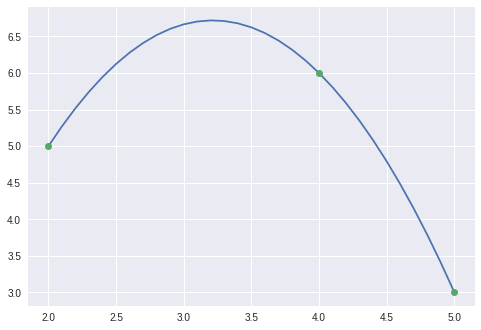

In [0]:
from pylab import*
def f(t): return -7*t**2/6 +15*t/2 - 16/3
t=arange(2,5.1,0.1)
plot(t,f(t))	#Gráfico del polinomio
plot(x,y,'o')	#Gráfico de los puntos
grid(True)
show()

La recta de mínimos cuadrados en notación matricial

Dado un conjunto de observaciones (xi, yi), i=1,2, . . . , n, se propone el siguiente modelo para representarlas:
                                                                           $Y = a_1 + a_2X$

De tal manera que cada dato pertenezca al modelo propuesto:
                                                                        $y_1 = a_1 + a_2x_1 y_2 = a_1 + a_2x_2$
                                                                                                     . . .
                                                                       $y_n = a_1 + a_2x_n$
                                                                       
Estas ecuaciones se pueden expresar en notación matricial: 

$\left( \begin{array}{c}y_1  \\y_2  \\...\\y_n \end{array} \right)\ =\ \left( \begin{array}{cc}1  & x_1 \\1 & x_2\\... &  ...\\1 & x_n\end{array} \right) =$
$\left( \begin{array}{cc}a_1 \\a_2\end{array} \right)\ $ $=>Y=XA$,  con  $A=\left( \begin{array}{cc}a_1 \\a_2\end{array} \right)\ $ 

Para calcular el vector A, la matriz X se la multiplica por su transpuesta para hacerla cuadrada:

$X^{T} Y = (X^TX)A $	de donde se puede obtener el vector solución:	$A = (X^{T}X)^{-1}(X^{T}Y)$

Solución del ejemplo anterior con la notación matricial y la librería NumPy de Python:


In [0]:
from numpy import*
X=[[1,43],[1,64],[1,38],[1,57],[1,30]]
Y=[[75],[82],[70],[76],[68]]
A=dot(linalg.inv(dot(transpose(X),X)),dot(transpose(X),Y))
print(A) 

[[56.76099327]
 [ 0.37584066]]


La fórmula de Lagrange con un vector.

La siguiente modificación de la función lagrange se utilizará para enviar un vector y obtener un conjunto de puntos interpolados con el polinomio de Lagrange. Esta función permite evaluar el polinomio con un conjunto más denso de valores en el dominio del parámetro de tal manera que se pueda representar graficamente la curva con más precisión



In [0]:
from sympy import*
def lagrange_vector(x,y,u): 
 t=Symbol('t')
 n=len(x)
 p=0
 for i in range(n):
  L=1
 for j in range(n):
  if j!=i:
     L=L*(t-x[j])/(x[i]-x[j])
  p=p+y[i]*L
  q=[]
 for i in range(len(u)):
  r=p.subs(t,u[i])
  q=q+[r]
 return q

Para  el  trazado  de  la  curva  parametrizada  se  tomarán  300  puntos  del  parámetro	t
espaciados a una distancia 0.01.

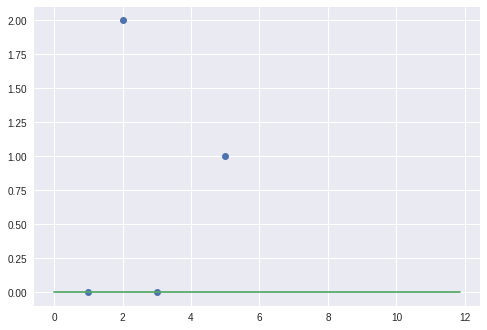

In [0]:
from pylab import*
x=[1,2,5,3]
y=[0,2,1,0]
t=[0,1,2,3]
u=arange(0,3,0.01)
ux=lagrange_vector(t,x,u)	#Conjunto de puntos del polinomio x(t)
uy=lagrange_vector(t,y,u)	#Conjunto de puntos del polinomio y(t)
plot(x,y,'o')
plot(ux,uy,'-')
grid(True)
show()